Task 1: Basic Image Operations
Image Size: 577x536
Number of channels: 3
Total pixels: 309272
Number of black pixels: 293326
Size of binary image: (536, 577)


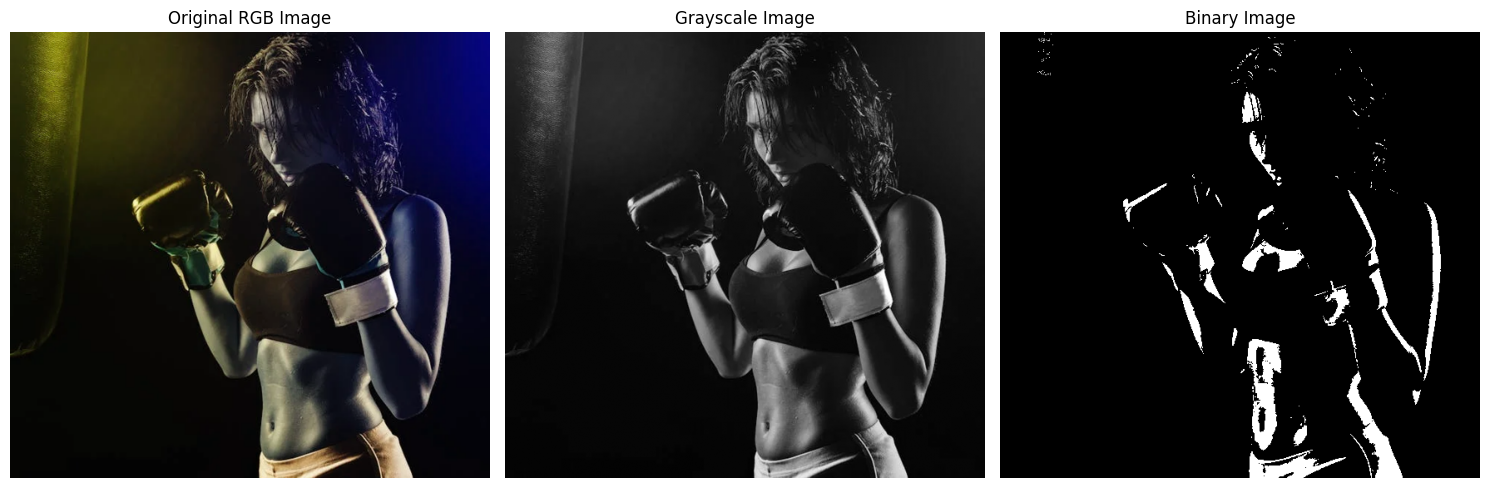


Task 2: Edge Detection and Segmentation


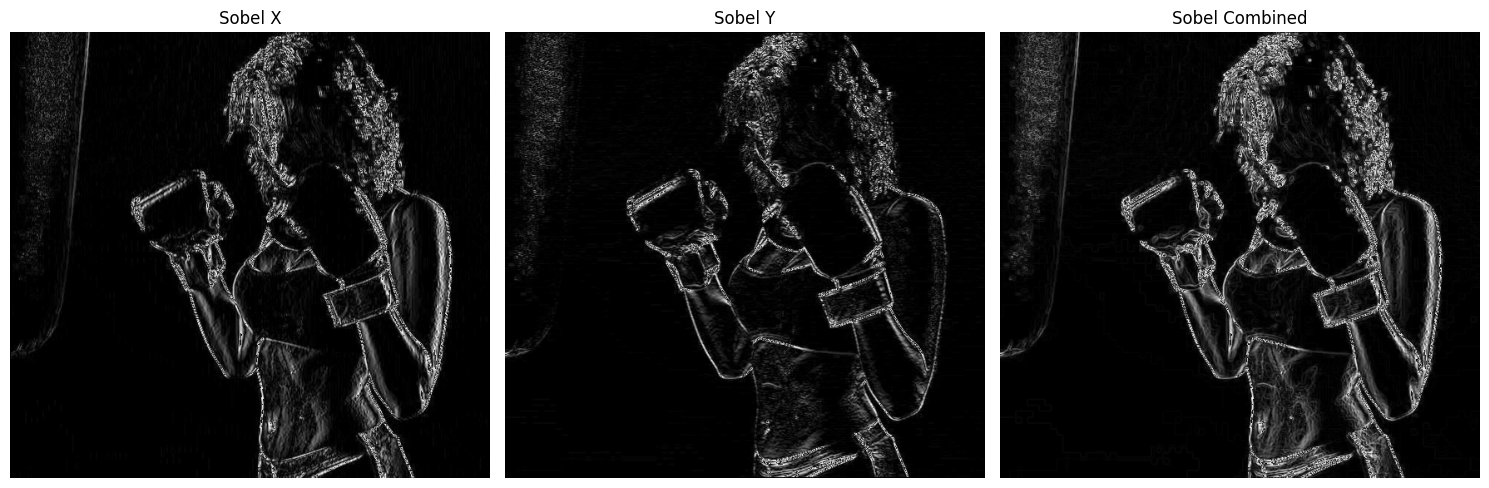

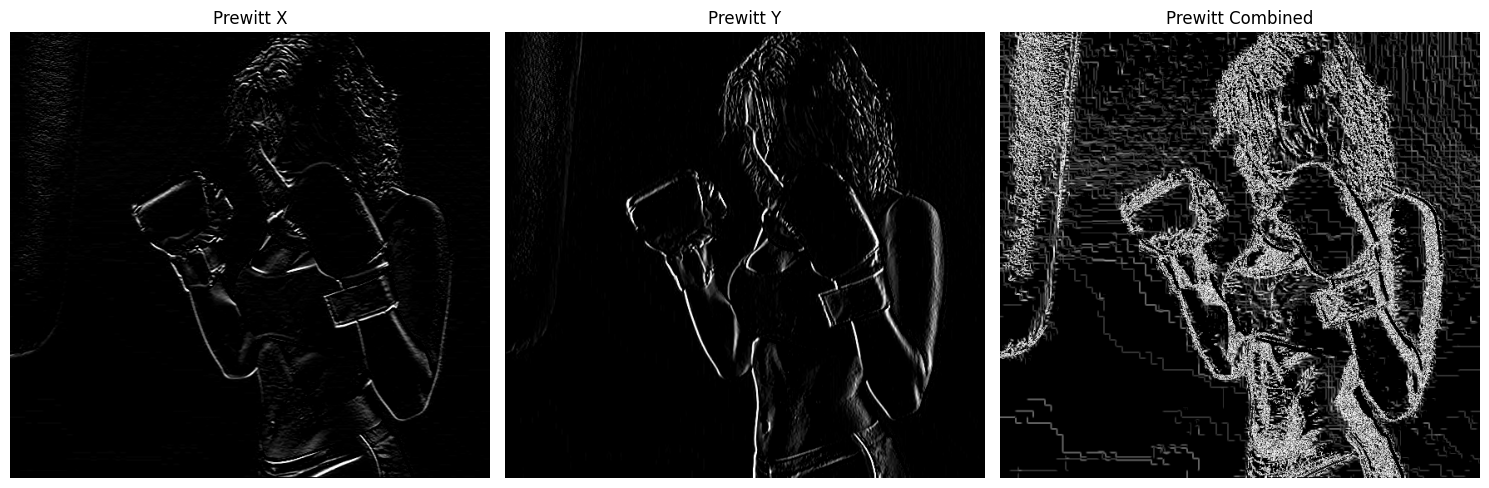

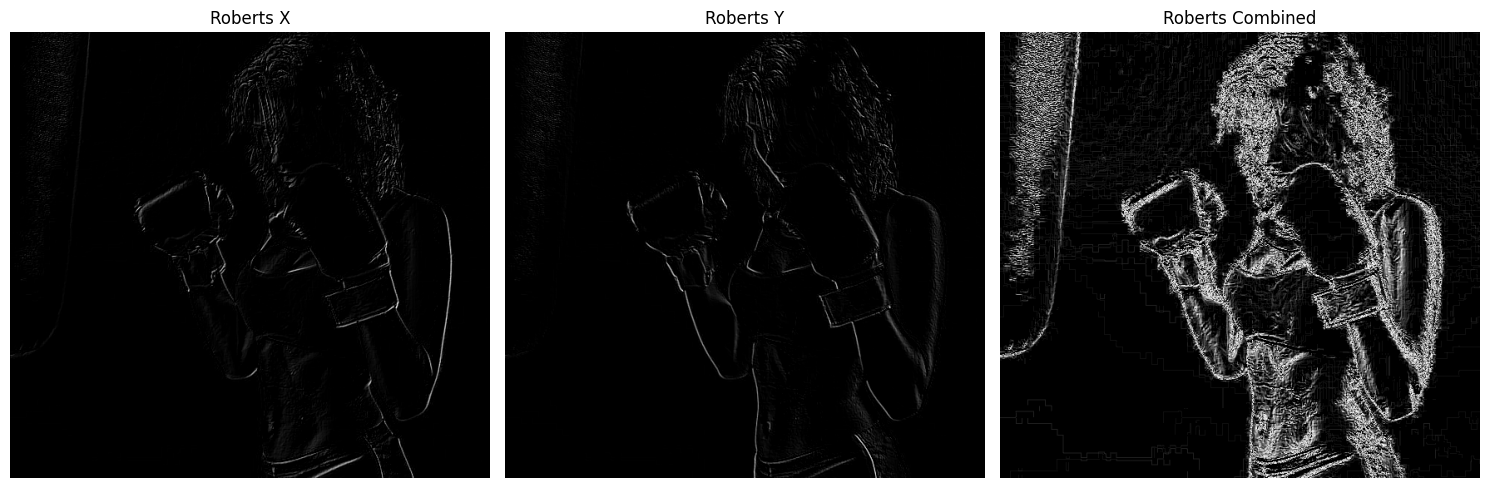

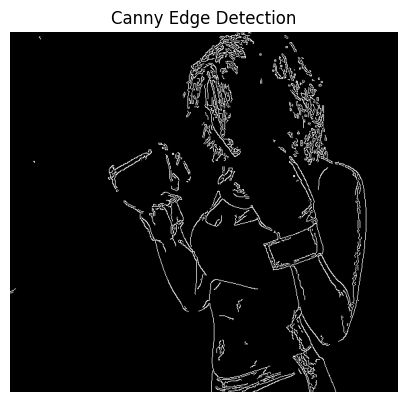

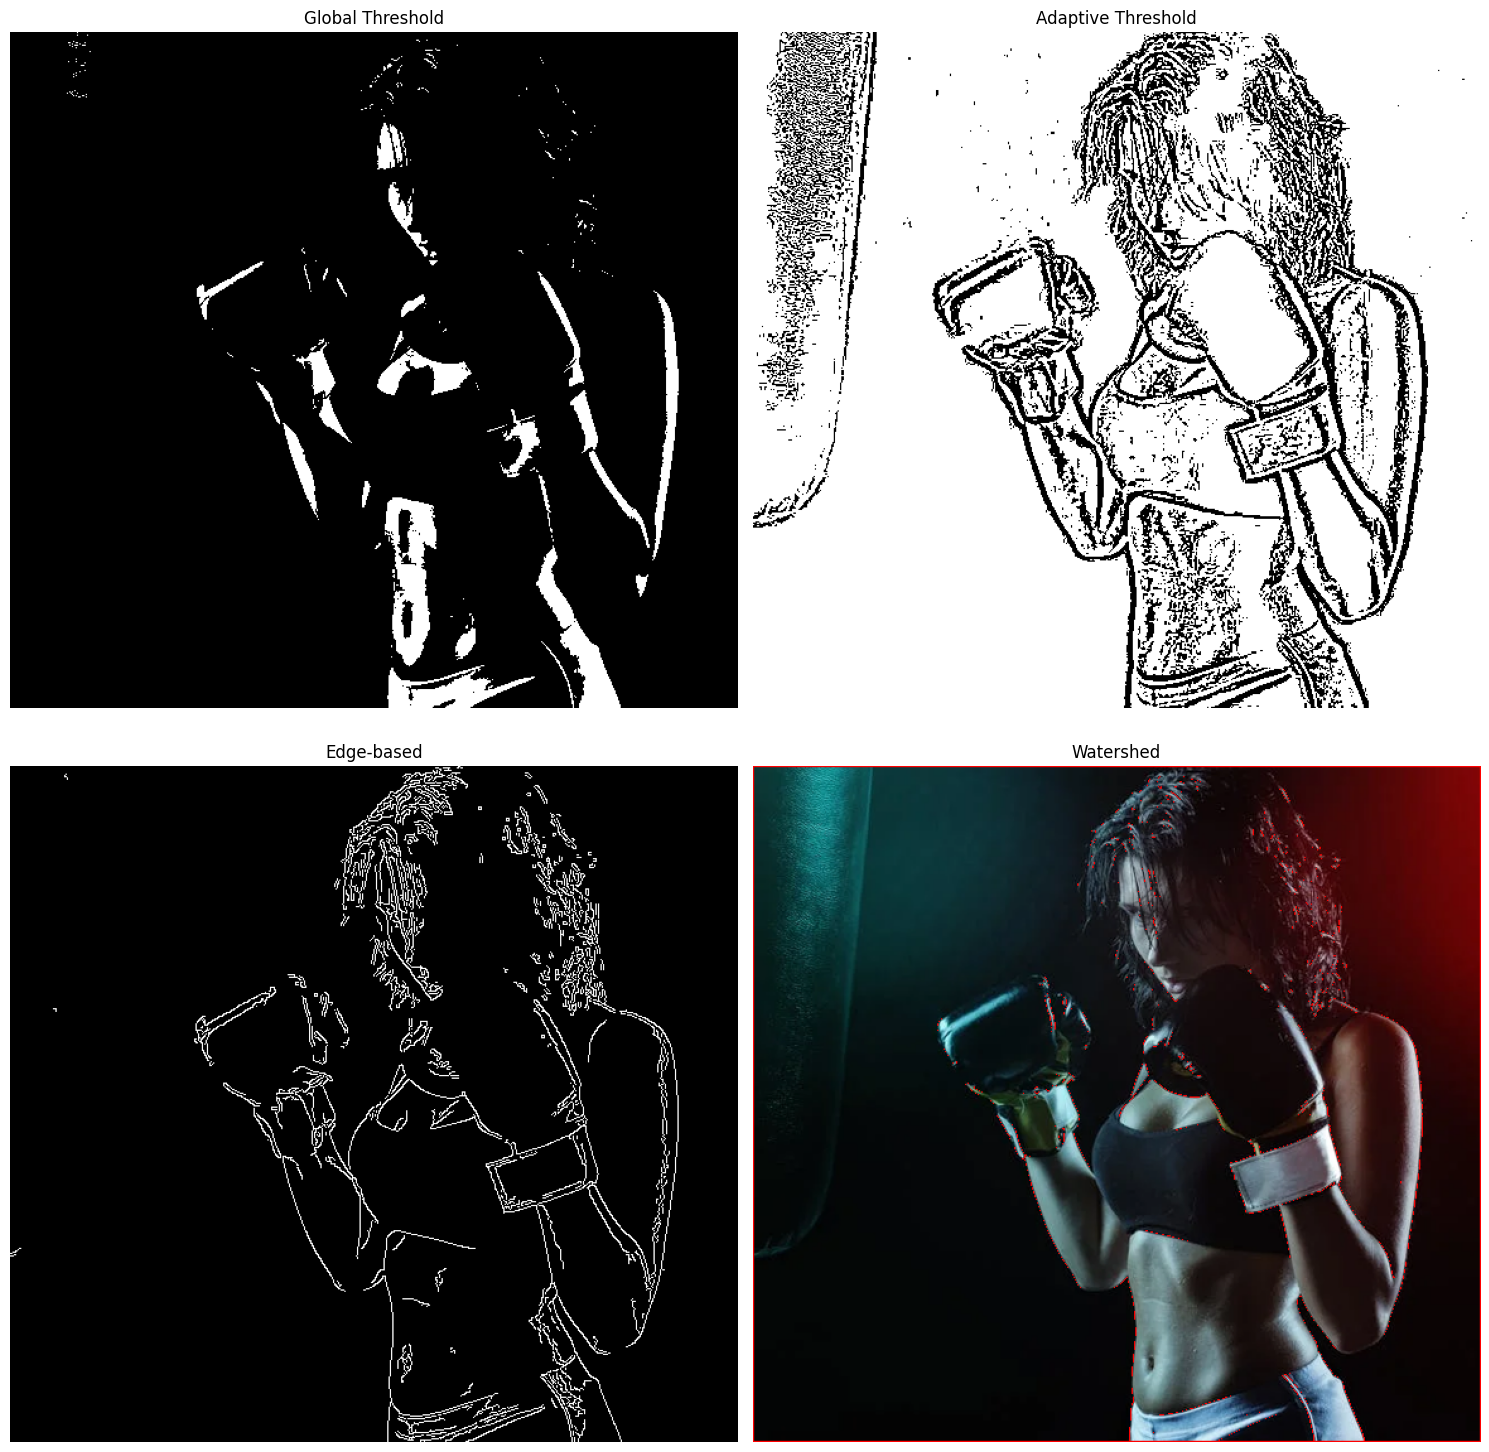

In [30]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Function to display images in a grid
def display_images_grid(images, titles, rows, cols, figsize=(15, 15)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i+1)
        if len(img.shape) == 2:  # Grayscale image
            plt.imshow(img, cmap='gray')
        else:  # Color image
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Task 1: Basic Image Operations
def task1(image_path):
    print("Task 1: Basic Image Operations")

    # 1. Read the image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Image not found")

    # 2. Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 3. Extract image size
    height, width, channels = img.shape
    print(f"Image Size: {width}x{height}")
    print(f"Number of channels: {channels}")

    # 4. Calculate total pixels
    total_pixels = height * width
    print(f"Total pixels: {total_pixels}")

    # 5. Convert to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 6. Convert to binary using threshold
    _, img_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

    # Count black pixels and get image size
    black_pixels = np.sum(img_binary == 0)
    print(f"Number of black pixels: {black_pixels}")
    print(f"Size of binary image: {img_binary.shape}")

    # Display all results from Task 1
    images = [img_rgb, img_gray, img_binary]
    titles = ['Original RGB Image', 'Grayscale Image', 'Binary Image']
    display_images_grid(images, titles, 1, 3, (15, 5))

# Task 2: Image Properties and Edge Detection
def task2(image_path):
    print("\nTask 2: Edge Detection and Segmentation")

    # Read image
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 1. Edge Detection
    # i. Sobel Operator
    sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel_x = np.uint8(np.absolute(sobel_x))
    sobel_y = np.uint8(np.absolute(sobel_y))
    sobel = np.uint8(np.absolute(sobel))

    # Display Sobel results
    display_images_grid([sobel_x, sobel_y, sobel],
                       ['Sobel X', 'Sobel Y', 'Sobel Combined'],
                       1, 3, (15, 5))

    # ii. Prewitt Operator
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    prewitt_x = cv2.filter2D(img_gray, -1, kernelx)
    prewitt_y = cv2.filter2D(img_gray, -1, kernely)
    prewitt = np.sqrt(prewitt_x**2 + prewitt_y**2)
    prewitt = np.uint8(np.absolute(prewitt))

    # Display Prewitt results
    display_images_grid([prewitt_x, prewitt_y, prewitt],
                       ['Prewitt X', 'Prewitt Y', 'Prewitt Combined'],
                       1, 3, (15, 5))

    # iii. Roberts Cross Operator
    roberts_x = np.array([[1, 0], [0, -1]])
    roberts_y = np.array([[0, 1], [-1, 0]])
    roberts_gx = cv2.filter2D(img_gray, -1, roberts_x)
    roberts_gy = cv2.filter2D(img_gray, -1, roberts_y)
    roberts = np.sqrt(roberts_gx**2 + roberts_gy**2)
    roberts = np.uint8(np.absolute(roberts))

    # Display Roberts results
    display_images_grid([roberts_gx, roberts_gy, roberts],
                       ['Roberts X', 'Roberts Y', 'Roberts Combined'],
                       1, 3, (15, 5))

    # iv. Canny Edge Detector
    canny = cv2.Canny(img_gray, 100, 200)

    # Display Canny result
    plt.figure(figsize=(5, 5))
    plt.imshow(canny, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.axis('off')
    plt.show()

    # 2. Image Segmentation
    # i. Global Thresholding
    _, global_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

    # ii. Adaptive Thresholding
    adaptive_thresh = cv2.adaptiveThreshold(img_gray, 255,
                                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 11, 2)

    # iii. Edge-based Segmentation (using Canny)
    edges_seg = cv2.Canny(img_gray, 100, 200)

    # iv. Watershed Segmentation
    ret, markers = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    markers = cv2.connectedComponents(markers.astype(np.uint8))[1]
    markers = markers + 1
    markers[img_gray < 30] = 0
    markers = cv2.watershed(img, markers)
    watershed_img = img.copy()
    watershed_img[markers == -1] = [0, 0, 255]  # Mark boundaries in red

    # Display segmentation results
    display_images_grid([global_thresh, adaptive_thresh, edges_seg, watershed_img],
                       ['Global Threshold', 'Adaptive Threshold',
                        'Edge-based', 'Watershed'],
                       2, 2, (15, 15))

def main():

    image_path = "/content/img1.png"

    # Execute both tasks
    task1(image_path)
    task2(image_path)

if __name__ == "__main__":
    main()